<a href="https://colab.research.google.com/github/KrishaDavda1411/Sentiment_Analysis/blob/main/ML_Project(price_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Real Estate - price prediction



    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's


In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
file = r'/gdrive/MyDrive/Colab Notebooks/tutorial/project_1_RealEstate/housing.csv'


In [ ]:
housing = pd.read_csv(file)
print(housing.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
housing ['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [ ]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.282409,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703532,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

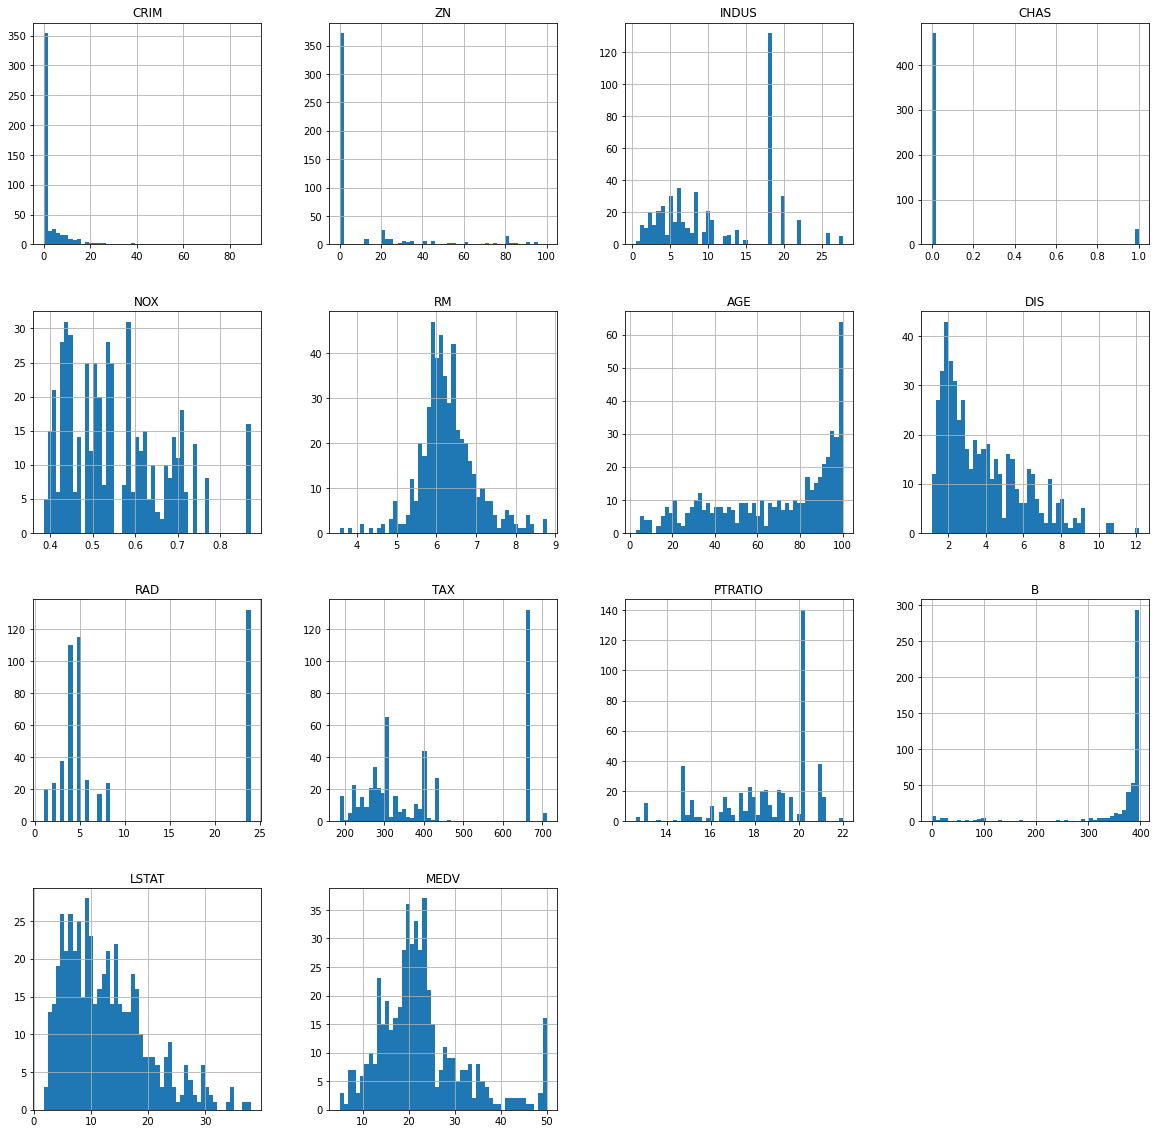

In [ ]:
housing.hist(bins = 50,figsize = (20,20))
plt.show()

#Train-Test Splitting

The numpy random seed is a numerical value that generates a new set or repeats pseudo-random numbers. The value in the numpy random seed saves the state of randomness. If we call the seed function using value 1 multiple times, the computer displays the same random numbers.

In [ ]:
import numpy as np
#for learning
def split_train_test(data,test_ratio):
  np.random.seed(42)
  shuffled = np.random.permutation(len(data))
  print(shuffled)
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffled[:test_set_size]
  train_indices = shuffled[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
# train_set, test_set = split_train_test(housing,0.2)
# print(f"rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing , test_size=0.2,random_state=42)
print(f"rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

rows in train set: 404
Rows in test set: 102



#stratified sampling

Python iloc() function enables us to select a particular cell of the dataset, that is, it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset.


What is data LOC?
The loc() function helps us to retrieve data values from a dataset at an ease. Using the loc() function, we can access the data values fitted in the particular row or column based on the index value passed to the function.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1, test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [ ]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [ ]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [ ]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [ ]:
housing = strat_train_set.copy()

#Looking for corelations

for cleaning data we uses correlation

strong -> 1

weak -> -1

values of correlation between -1 to 1

In [ ]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending =False)

MEDV       1.000000
RM         0.677774
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c55d7de10>,
      dtype=object)

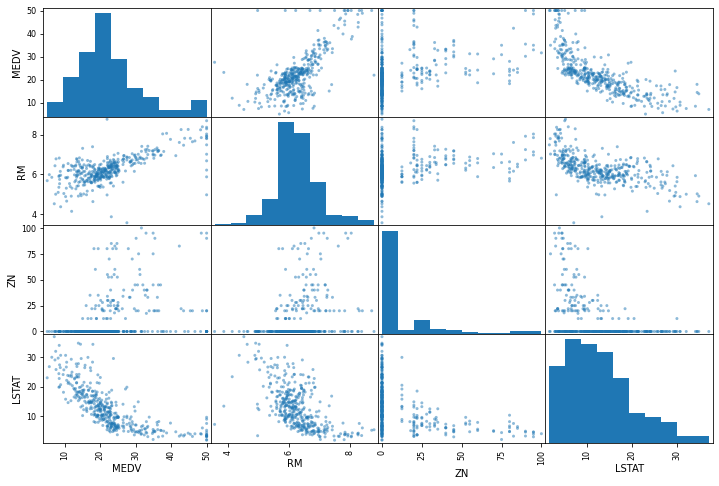

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

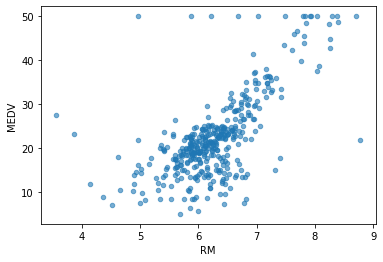

In [ ]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.6)

in above fig we can remove points that are out side of traffic area 

#Trying out attribute combinations

In [ ]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]
housing["TAXRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [ ]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [ ]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending =False)

MEDV       1.000000
RM         0.677774
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.524452
LSTAT     -0.740494
Name: MEDV, dtype: float64

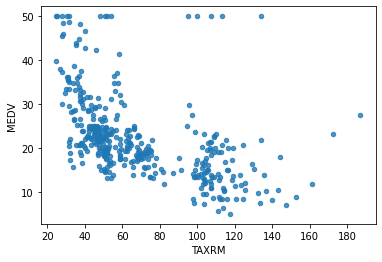

In [ ]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [ ]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

#missing attribute

to take care of missing atttribute , you have 3 options

1. get rid of missing attribute
2. get rid of whole attribute
3. set value to some value(0,mean or median)

In [ ]:
a = housing.dropna(subset=["RM"]) #option 1
a.shape
a
#  original housing datafram will be remain unchanged

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


In [ ]:

housing.drop("RM",axis =1)#op2
#no RM column but original housing datafram will be remain unchanged

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [ ]:
# op3 --> median
median  = housing["RM"].median()
housing["RM"].fillna(median)
#  original housing datafram will be remain unchanged becoz not given inplace=TRUE

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [ ]:
housing.describe()#before we started imputer

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277055,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714224,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.629500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_  #calcuteted median

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [ ]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.276213,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.709820,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.626000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


#Scikit-learn Design

primarily three types of objects
1. Estimators -> it estimate some perameter based on dataset eg: imputer

  It has fit method and transform method
   

*   **fit method** - fits dataset and fit method - fits dataset and calculate internal parameter


2. Transformers ->  transform method take input and return output based on learning from fit(). It also has aconvenience function called fit_transform() which fits and then transforms.
3. Predictors -> LinearRegression model is a example of predictor. fit() and predict() are two common function. It also gives **score()** function which will evaluate the prediction.

## feature scaling

primarily, two types of feture scalling methods
1. Min-Max scalling (Normalization)


  * (value - min)/(max-min)
    * sklearn provides a class called **MinMaxScaler** for this


2. Standardixation
    * (value-mean)/std
     
    *Sklearn provides class called **Standard scaler** for this


## Creating a pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
  ('imputer',SimpleImputer(strategy="median")),
  # add as many as you want in your pipeline
  ('std_scaler',StandardScaler()),
])


In [ ]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [ ]:
housing_num_tr.shape

(404, 13)

#Selecting a desired model for Real Estates

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [ ]:
some_data = housing.iloc[:5]
some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [ ]:
some_labels = housing_labels.iloc[:5]

In [ ]:
prepared_data = my_pipeline.transform(some_data)

In [ ]:
model.predict(prepared_data)

array([22.612, 25.059, 16.475, 23.285, 23.636])

In [ ]:
list(some_labels )

[21.9, 24.5, 16.7, 23.1, 23.0]

#Evalueting the model

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)
rmse

1.1945212171070088

# using better evaluation technique - Cross validation 

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring ="neg_mean_squared_error", cv =10)#10 points
rmse_scores = np.sqrt(-scores)

In [ ]:
rmse_scores 

array([2.79341621, 2.71813025, 4.35878335, 2.61633134, 3.71492546,
       2.86050421, 4.88421534, 3.39096727, 3.33449178, 3.27832299])

In [ ]:
def print_scores(scores):
  print("Scores: ",scores)
  print("Mean: ",scores.mean())
  print("Standrad deviation: ",scores.std())

In [ ]:
print_scores(rmse_scores)

Scores:  [2.79341621 2.71813025 4.35878335 2.61633134 3.71492546 2.86050421
 4.88421534 3.39096727 3.33449178 3.27832299]
Mean:  3.3950088202451147
Standrad deviation:  0.7055742608627517


In [ ]:
accuracy= model.score(housing_num_tr,housing_labels)
print(f"{accuracy*100:.2f}%")

98.38%


#model output from diff models

Decision tree data

Scores:  [3.86627066 4.52524086 4.99846318 4.50135481 4.06964372 3.79282217
 6.47441117 3.7616818  3.46979827 3.66824209]

Mean:  4.312792872049839

Standrad deviation:  0.8474732653476549

linear Regression data

Scores:  [4.18133144 4.26230168 5.07838064 3.8398305  5.49992718 4.40336203
 7.4548364  5.49832696 4.13591309 6.05129066]

Mean:  5.0405500587574785

Standrad deviation:  1.0621875788278887

accuracy -> 73.29%

RandomForestRegressor

Scores:  [2.76644442 2.87276386 4.53264221 2.59620584 3.91781889 2.78115951
 4.76252387 3.35626948 3.25702457 3.21874378]

Mean:  3.406159640632283

Standrad deviation:  0.7190781632373708

Accuracy : 98.15%

#Selected model is RandomForestRegressor

#Saving the model

In [ ]:
import joblib 
file = r'/gdrive/MyDrive/Colab Notebooks/tutorial/project_1_RealEstate/Real_estate_joblib'
joblib.dump(model,file)

['/gdrive/MyDrive/Colab Notebooks/tutorial/project_1_RealEstate/Real_estate_joblib']

#Testing the model on test data

In [ ]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_prediction = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_prediction)
final_rmse = np.sqrt(final_mse)
print(final_prediction,"\n",list(Y_test))

[23.586 11.205 25.502 22.337 18.287 15.194 20.035 15.187 31.683 40.773
 19.328 11.841 24.153 25.703 19.649 10.964 32.002 14.36  23.598 19.106
 19.831 18.206 15.674 21.773 18.24  31.841 16.261 33.549  8.292 33.388
 24.183 21.143 23.31  11.303 20.827 11.439 42.512 24.682 23.881 42.253
 24.22  29.912 20.61  21.272 19.294 32.895 44.448 20.51  20.428 22.173
 21.243 14.953 21.427 15.822 24.671 33.213 41.754 28.315 19.552 20.947
 47.001  9.384 18.831 28.508 14.951 34.051 19.496 18.109 18.907 33.597
 25.935 23.441 21.269 22.958 35.104 11.966 15.89  19.995 21.202 21.159
 22.947 21.383 13.669 23.711 20.651 21.283 13.845 21.316 22.053 23.341
 18.387 27.875  7.308 25.781 19.015 29.754 19.688 33.79  14.296 27.027
 21.443 20.462] 
 [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33

In [ ]:
final_rmse

2.8556868941210785

In [ ]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23727347, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

#Using model

In [ ]:
import joblib
file = r'/gdrive/MyDrive/Colab Notebooks/tutorial/project_1_RealEstate/Real_estate_joblib'
model = joblib.load(file)
import numpy as np
feature = np.array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -11.23727347, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

model.predict([feature])

array([21.539])